### Text Mining assignment 2

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [1]:
!pip install spacy

In [3]:
!pip install WordCloud

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests
import string

from matplotlib.pyplot import imread
from wordcloud import WordCloud

import spacy
import nltk

import re
from textblob import TextBlob

%matplotlib inline

In [ ]:
wm_title=[]  
wm_date = []
wm_content = []
wm_rating = []

review_title = []
review_rating = []
review_content = []
review_dates = []


for i in range(1,150):
    link ="https://www.amazon.in/OnePlus-Nord-Charcoal-128GB-Storage/product-reviews/B09576CYNP/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response = requests.get(link)
    print(i)
    soup = bs(response.content,"html.parser")
    title = soup.find_all('a',class_='review-title-content')
   # title = soup.find_all('a',class_='review-title-content')

    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
        review_title[:] = [titles.lstrip('\n') for titles in review_title]
        review_title[:] = [titles.rstrip('\n') for titles in review_title]
        wm_title = wm_title + review_title
    
    rating = soup.find_all('i',class_='review-rating')

    for i in range(2,len(rating)):
        review_rating.append(rating[i].get_text())
        review_rating[:] = [reviews.rstrip(' out of 5 stars') for reviews in review_rating]
        wm_rating = wm_rating + review_rating 
        
    review = soup.find_all("span",{"data-hook":"review-body"})

    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
        review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
        wm_content = wm_content + review_content
        
    dates = soup.find_all('span',class_='review-date')

    for i in range(2,len(rating)):
        review_dates.append(dates[i].get_text())
        review_dates[:] = [reviews.lstrip('Reviewed in India on') for reviews in review_dates]
        wm_date  = wm_date + review_dates
   
   

In [119]:
dataframe_contents = list(zip(wm_title, wm_rating, wm_content, wm_date))


In [120]:
dataframe = pd.DataFrame(dataframe_contents, columns=["Title", "Rating", "Content", "Date"])

In [121]:
dataframe.dtypes

Title      object
Rating     object
Content    object
Date       object
dtype: object

In [122]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Rating'] = dataframe['Rating'].astype(float)

In [123]:
dataframe.shape

(551775, 4)

In [125]:
dataframe.tail()

,Title,Rating,Content,Date
551770,Can go,5.0,Iam not using this phone for games or for vi...,2021-06-28
551771,OnePlus Nord,5.0,OnePlus Nord CE is an affordable OnePlus Pho...,2021-06-27
551772,Waste.,1.0,Waste. They are just changing the brand nam...,2021-07-18
551773,Butter smooth..outstanding display !!,5.0,"Go for it, I am loving it.Great mobile recep...",2021-06-25
551774,Not fully satisfied with this phone.,3.0,Good performance.Good rear camera but front ...,2021-06-21


<AxesSubplot:xlabel='Rating', ylabel='count'>

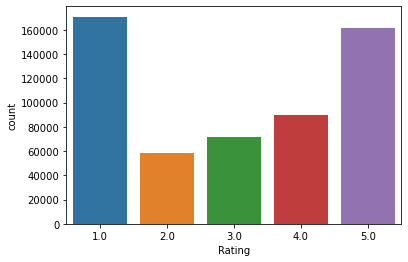

In [126]:
sns.countplot(x = 'Rating', data = dataframe)

In [127]:
def clean_content(Content):
    content = re.sub('@[A-Za-z0–9]+', '', Content) #Removing tag(@)
    content = re.sub('#', '', Content) # Removing hashtag(#)
    content = re.sub('RT[\s]+', '', Content) # Removing RT
    content = re.sub('https?:\/\/\S+', '', Content) # Removing links
    return content
 
dataframe["Text"] = dataframe.Content.apply(clean_content)
dataframe.head()

,Title,Rating,Content,Date,Text
0,Bakwas phone,1.0,Bakwas phone,2021-06-20,Bakwas phone
1,Bakwas phone,1.0,Bakwas phone,2021-06-20,Bakwas phone
2,After replacement..now better,3.0,Few issues are resolved that are mention bel...,2021-06-20,Few issues are resolved that are mention bel...
3,Bakwas phone,1.0,Bakwas phone,2021-06-20,Bakwas phone
4,After replacement..now better,3.0,Few issues are resolved that are mention bel...,2021-06-20,Few issues are resolved that are mention bel...


#### Calculating Subjectivity and polarity

Subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective,

while polarity simply means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment

In [128]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Text.apply(calc_subj)
dataframe['Polarity'] = dataframe.Text.apply(calc_pola)
dataframe.head()

,Title,Rating,Content,Date,Text,Subjectivity,Polarity
0,Bakwas phone,1.0,Bakwas phone,2021-06-20,Bakwas phone,0.000,0.000000
1,Bakwas phone,1.0,Bakwas phone,2021-06-20,Bakwas phone,0.000,0.000000
2,After replacement..now better,3.0,Few issues are resolved that are mention bel...,2021-06-20,Few issues are resolved that are mention bel...,0.625,0.044444
3,Bakwas phone,1.0,Bakwas phone,2021-06-20,Bakwas phone,0.000,0.000000
4,After replacement..now better,3.0,Few issues are resolved that are mention bel...,2021-06-20,Few issues are resolved that are mention bel...,0.625,0.044444


In [130]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
dataframe['Sentiment'] = dataframe.Polarity.apply(sentiment)
dataframe.tail()

,Title,Rating,Content,Date,Text,Subjectivity,Polarity,Sentiment
551770,Can go,5.0,Iam not using this phone for games or for vi...,2021-06-28,Iam not using this phone for games or for vi...,0.750000,0.550000,Positive
551771,OnePlus Nord,5.0,OnePlus Nord CE is an affordable OnePlus Pho...,2021-06-27,OnePlus Nord CE is an affordable OnePlus Pho...,0.686111,0.438889,Positive
551772,Waste.,1.0,Waste. They are just changing the brand nam...,2021-07-18,Waste. They are just changing the brand nam...,0.000000,-0.200000,Negative
551773,Butter smooth..outstanding display !!,5.0,"Go for it, I am loving it.Great mobile recep...",2021-06-25,"Go for it, I am loving it.Great mobile recep...",0.544444,0.330035,Positive
551774,Not fully satisfied with this phone.,3.0,Good performance.Good rear camera but front ...,2021-06-21,Good performance.Good rear camera but front ...,0.566667,0.143750,Positive


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

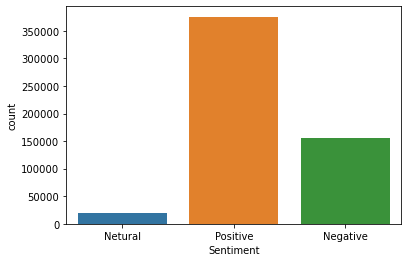

In [131]:
sns.countplot(x = 'Sentiment', data = dataframe)

Text(0, 0.5, 'Subjectivity')

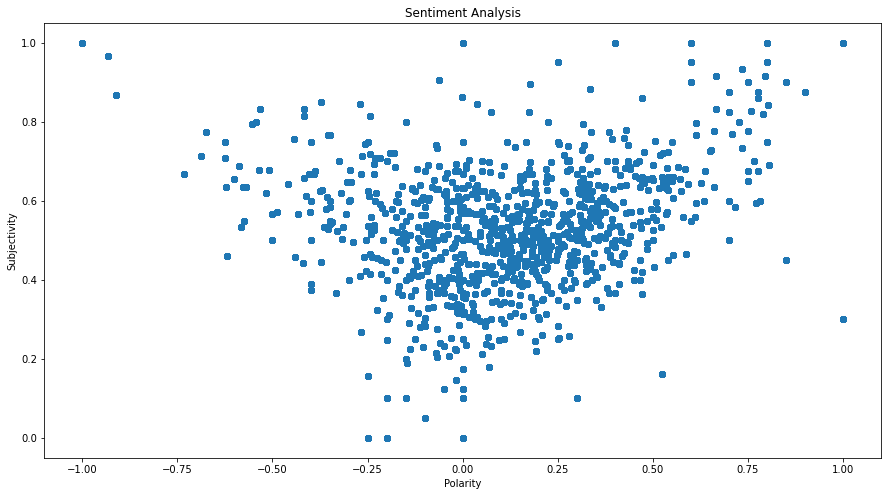

In [132]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=dataframe['Sentiment'].value_counts(), name="Sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

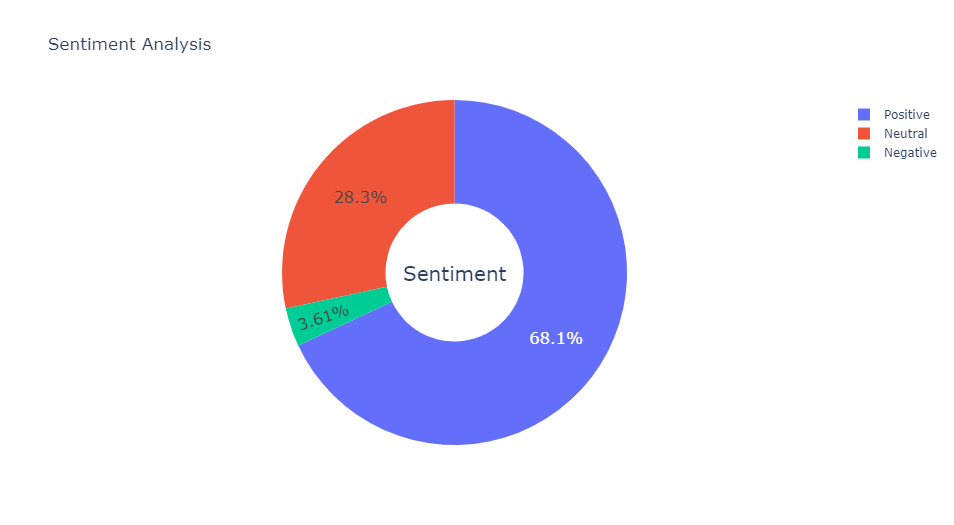

In [134]:
# setting up stop words 
nltk.download('stopwords')  
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords = ' '.join([twts for twts in dataframe['Text']])
#allWords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
# setting up stop words 
nltk.download('stopwords')  # run this if you get any error
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords_ = ' '.join([twts for twts in dataframe[:500]['Text']])
 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


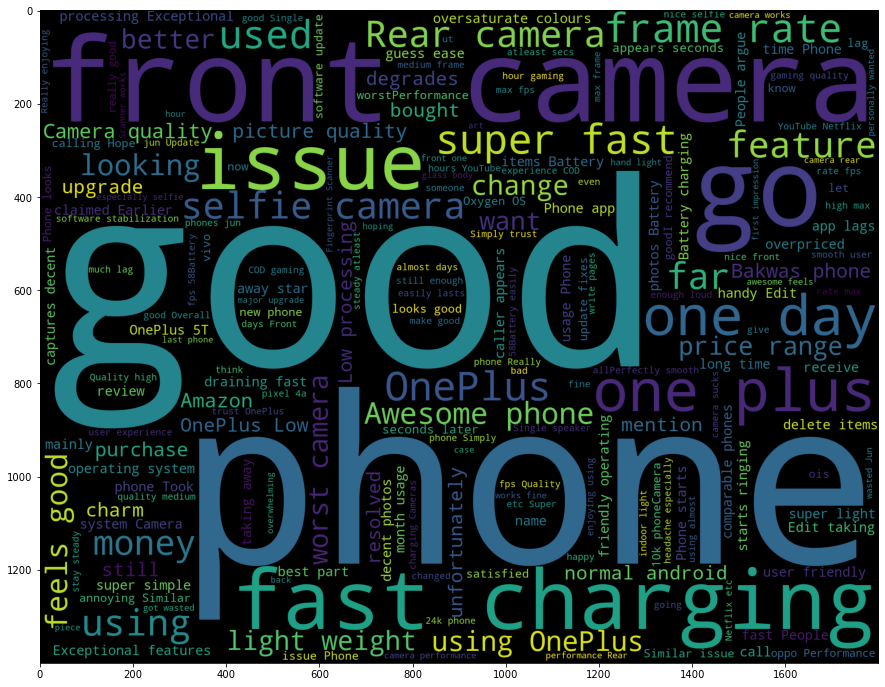

In [140]:
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [146]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
with open("negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")
  

pos_words = poswords[35:]
neg_words = negwords[35:]


sentences = dataframe[0:500]["Text"].to_list()

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re

filtered_sent=[]
for i in range(len(sentences)):
    review = re.sub("[^A-Za-z" "]+"," ",sentences[i])
    review = re.sub("[0-9" "]+"," ",sentences[i])
    
    review = review.lower()
    review =review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered_sent.append(review)

filtered_sent[0:5]



['bakwas phone',
 'bakwas phone',
 'issue resolved mention below..but still mobile charm oneplus..it like normal android..not oneplus..low processing, exceptional feature oneplus phone..took long time delete items..battery draining fast..charging fast claimed..earlier using oneplus t..i bought upgrade unfortunately degrades...',
 'bakwas phone',
 'issue resolved mention below..but still mobile charm oneplus..it like normal android..not oneplus..low processing, exceptional feature oneplus phone..took long time delete items..battery draining fast..charging fast claimed..earlier using oneplus t..i bought upgrade unfortunately degrades...']

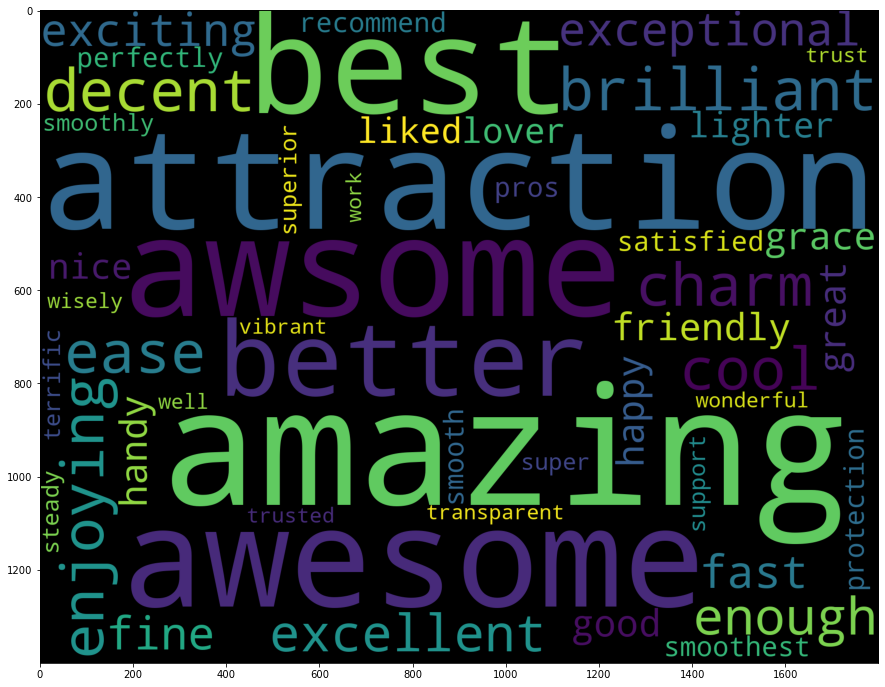

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(filtered_sent)
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
sentences_df =pd.DataFrame(denselist, columns=feature_names)
sentences_df.head()

f, axes = plt.subplots(figsize=(20,12))
pos_words = ' '.join([w for w in sentences_df if w in poswords])

cloud_pos = WordCloud(
        background_color = 'black',
        width =1800,
        height=1400).generate(pos_words)
plt.imshow(cloud_pos)

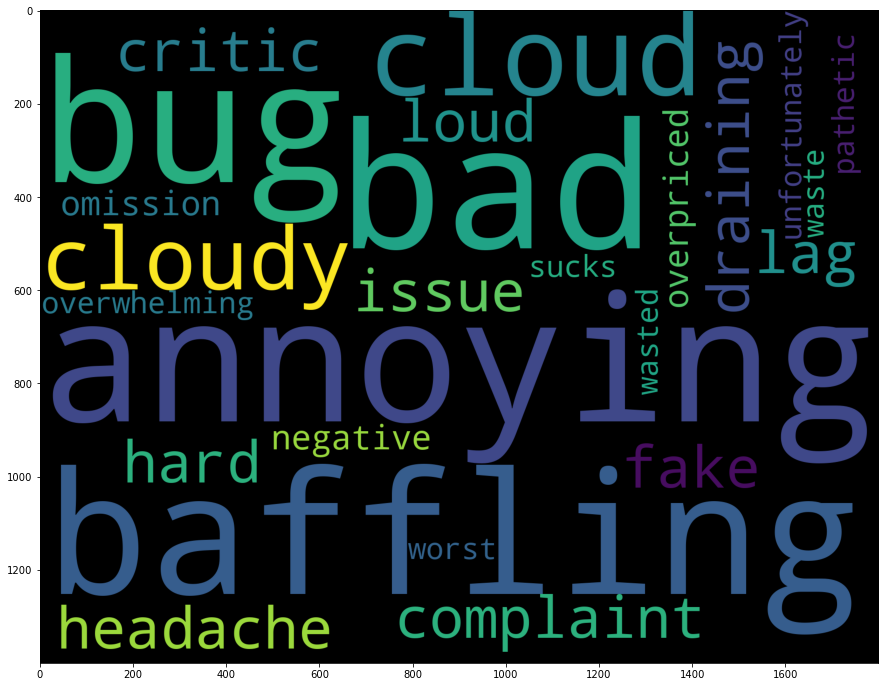

In [144]:
f, axes = plt.subplots(figsize=(20,12))
neg_words = ' '.join([w for w in sentences_df if w in negwords])

cloud_neg = WordCloud(
        background_color='black',
        width =1800,
        height =1400).generate(neg_words)
plt.imshow(cloud_neg)